# Importation des bibliothèques:

In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Télécharger "MNIST" Data Set

Tensorflow déjà contient MNIST data set qui peut être chargée en utilisant Keras

In [2]:
from keras.datasets import mnist #images de 28x28

# Diviser MNIST en train and test datasets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

# Visualiser quelques caractères

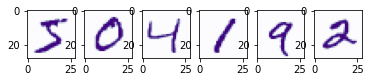

In [5]:
for i in range(6):
    plt.subplot(int('26'+str(i+1)))
    plt.imshow(X_train[i],cmap=plt.get_cmap('Purples'))

# Normalisation des données et Pre-Processing

In [6]:
from tensorflow.keras.utils import to_categorical

Lors de l'utilisation de modèles de réseau de neurones, il est bon d'effectuer une mise à l'échelle des valeurs d'entrée pour normaliser les valeurs de pixel dans la plage [0,1] en divisant chaque valeur par la valeur maximale 255 (Remarque : les valeurs de pixel sont en échelle de gris entre 0 et 255).

In [7]:
X_train = X_train / 255 #On peut utiliser une autre méthode tensorflow.keras.utils.normalize(X_train, axis=1)
X_test = X_test / 255

In [8]:
print(X_train[0]) #Visualiser les résultats après normalisation

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Nous savons que toutes les images sont représentées sous la forme d'une matrice 28×28 contenant des valeurs de pixels en niveaux de gris, donc la dimension des données d'apprentissage est (60000,28,28) mais le modèle CNN nécessitera une dimension supplémentaire, nous devons donc traiter les données en mettant la matrice sous la forme (60000,28,28,1).

In [9]:
#Redimensionner les données pour appliquer l'opération de Convolution
#format [Samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float')
#conversion en classe binaire
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
#Visualiser la nouvelle forme
print("Training samples dimension",X_train.shape)
print("Testing samples dimension",X_test.shape)

Training samples dimension (60000, 28, 28, 1)
Testing samples dimension (10000, 28, 28, 1)


# Création d'un réseau de neurones

In [11]:
#Importer les différents couches

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D

In [12]:
# Définir le modèle CNN
def model():
    num_classes = 10
    model = Sequential()
    #Première couche de convolution
    model.add(Convolution2D(32,kernel_size=(3,3),activation='relu'))
    #Deuxième couche de convolution
    model.add(Convolution2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #Pour réduire le surapprentissage en ignorant 25% d'unités
    model.add(Dropout(0.25))
    #Convertir les données en un tableau 1D
    model.add(Flatten())
    #
    model.add(Dense(256,activation='relu'))
    #Pour réduire le surapprentissage en ignorant 50% d'unités
    model.add(Dropout(0.5))
    
    #La dernière couche a 10 neurones pour les 10 classes
    model.add(Dense(num_classes,activation='softmax'))
    #
    model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    return model 

#Construire le modèle
model = model()

# Entrainement du modèle

La fonction model.fit () de Keras prend les données d'entraînement, les données de validation, les époques et la taille du lot pour entraîner le modèle. 
L'entrainement du modèle prend un certain temps en fonction d'environnement du travail.
Une fois terminé, nous enregistrerons le modèle dans le fichier nommé « model.h5 » pour une utilisation ultérieure.

In [13]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=10,batch_size=200, verbose=2)
print("****************************************\n")
print("le modèle s'est entraîné avec succès")

Epoch 1/10
300/300 - 117s - loss: 0.2178 - accuracy: 0.9332 - val_loss: 0.0487 - val_accuracy: 0.9842 - 117s/epoch - 391ms/step
Epoch 2/10
300/300 - 128s - loss: 0.0663 - accuracy: 0.9800 - val_loss: 0.0358 - val_accuracy: 0.9886 - 128s/epoch - 426ms/step
Epoch 3/10
300/300 - 111s - loss: 0.0474 - accuracy: 0.9852 - val_loss: 0.0306 - val_accuracy: 0.9896 - 111s/epoch - 369ms/step
Epoch 4/10
300/300 - 119s - loss: 0.0379 - accuracy: 0.9880 - val_loss: 0.0284 - val_accuracy: 0.9909 - 119s/epoch - 397ms/step
Epoch 5/10
300/300 - 113s - loss: 0.0308 - accuracy: 0.9903 - val_loss: 0.0259 - val_accuracy: 0.9910 - 113s/epoch - 375ms/step
Epoch 6/10
300/300 - 115s - loss: 0.0262 - accuracy: 0.9912 - val_loss: 0.0256 - val_accuracy: 0.9910 - 115s/epoch - 383ms/step
Epoch 7/10
300/300 - 115s - loss: 0.0227 - accuracy: 0.9929 - val_loss: 0.0283 - val_accuracy: 0.9917 - 115s/epoch - 383ms/step
Epoch 8/10
300/300 - 107s - loss: 0.0211 - accuracy: 0.9933 - val_loss: 0.0249 - val_accuracy: 0.9923 - 

In [14]:
model.save('model.h5')

print("*******************************************\n")
print("le modèle a été enregistré avec succès")

*******************************************

le modèle a été enregistré avec succès


# Evaluer le modèle

Pour évaluer les performances de notre modèle, nous disposons de 10 000 images de test de chiffres manuscrits. 
L'ensemble de données MNIST est bien équilibré, nous pouvons donc obtenir une précision d'environ 99% (c'est-à-dire une erreur CNN < 1%).

In [15]:
test_perte, test_perform = model.evaluate(X_test,y_test)
print('*********************************************\n')
print("La perte sur 10000 charactères est:", test_perte)
print("L'exactitude de la validation sur les 10000 charactères du test est:", test_perform)

313/313 [==============================] - 7s 21ms/step - loss: 0.0259 - accuracy: 0.9917
*********************************************

La perte sur 10000 charactères est: 0.025935595855116844
L'exactitude de la validation sur les 10000 charactères du test est: 0.9916999936103821


In [16]:
#Afficher le résumé du modèle
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 256)               2359552   
                                                        

# Test: tester le modèle en lui donnant l'image d'un chiffre

In [17]:
!pip install opencv-python

In [18]:
import cv2
img = cv2.imread("huit.png")

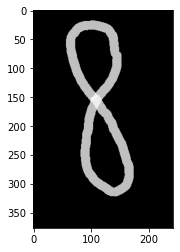

In [19]:
plt.imshow(img)

In [20]:
img.shape

(377, 242, 3)

In [21]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [22]:
gray.shape

(377, 242)

In [23]:
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)

In [24]:
resized.shape

(28, 28)

In [28]:
import tensorflow as tf
newimg = tf.keras.utils.normalize (resized, axis=1)
newimg = np.array(newimg).reshape (-1,28,28,1)
newimg.shape

(1, 28, 28, 1)

In [29]:
predictions = model.predict(newimg)

In [30]:
print (np.argmax(predictions))

8
